# Dakar Shapefile Examination

This notebook examines shapefiles of flood hot spots, population, and flood risk (according to EO4SD) for Dakar.

In [51]:
import matplotlib.pyplot as plt
import geopandas as gpd
import folium

# Load and show the flood hot spot area shape

In [31]:
dakar_flood_hotspot = gpd.read_file('../floodareas/Dakar_flooding.geojson')
# .geometry[0]

In [23]:
fld_ctrd = dakar_flood_hotspot.centroid

In [24]:
m = folium.Map([fld_ctrd.y, fld_ctrd.x], 
               zoom_start=13)
folium.GeoJson(dakar_flood_hotspot).add_to(m)
m

# Load and show the population data

In [97]:
pop_data = gpd.read_file('../shapefile/Commune_DK.shp')

In [98]:
pop_data[['POP13', 'DENSITY', 'AREAKM', 'Départeme',
          'Commune', 'Nombre_de', 'Nombre_d_1', 'Nombre_tot', 'NAME']][:5]

,POP13,DENSITY,AREAKM,Départeme,Commune,Nombre_de,Nombre_d_1,Nombre_tot,NAME
0,21929,457,47.997541,RUFISQUE,YENE,315,831,1146,YENNE
1,33350,3834,8.697977,PIKINE,MALIKA,1062,1062,2124,MALIKA
2,343512,16770,20.483907,PIKINE,KEUR MASSAR,5443,8687,14130,KEUR MASSAR
3,209929,24059,8.725440,PIKINE,YEUMBEUL NORD,4659,6873,11532,YEUMBEUL NORD
4,93714,28369,3.303396,GUEDIAWAYE,WAKHINANE NIMZATT,2983,3705,6688,WAKHINANE NIMZATH


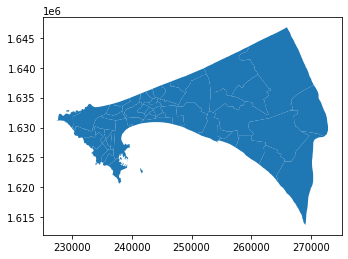

In [99]:
pop_data.plot()
plt.show()

# Load and show Dakar district shapes

In [4]:
dakar_district_shapes = gpd.read_file('../shapefile/Dakar_districts.geojson')

In [104]:
from shapely.ops import cascaded_union
cascaded_union(dakar_district_shapes.geometry)

# Show flood risk

In [105]:
dakar_flood_risk = gpd.read_file('../floodareas/eo4sd_dakar_frisk_2018/EO4SD_DAKAR_FRISK_2018.shp')

In [117]:
dakar_flood_risk.columns

Index(['WATERTYPE', 'HAZARDCODE', 'AREA', 'RISKCODE_H', 'RISKCODE_L', 'C_L1',
       'N_L1', 'C_L2', 'N_L2', 'C_L3', 'N_L3', 'C_L4', 'N_L4', 'RISKLEVEL',
       'ID', 'geometry'],
      dtype='object')

In [124]:
set(zip(dakar_flood_risk['RISKLEVEL'], 
         dakar_flood_risk['N_L1']))
# dakar_flood_risk['RISKCODE_L'].unique()

{('0', 1),
 ('High Risk', 2),
 ('High Risk', 3),
 ('Low Risk', 1),
 ('Low Risk', 2),
 ('Medium Risk', 1),
 ('Medium Risk', 2),
 ('Medium Risk', 3),
 ('Very High Risk', 3)}

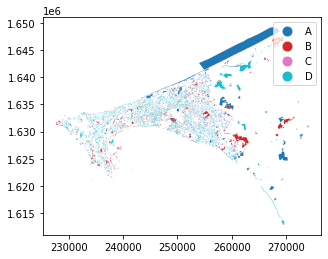

In [110]:
dakar_flood_risk.iloc[::5].plot(column='RISKCODE_L', legend=True)

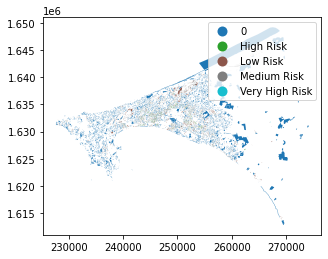

In [129]:
dakar_flood_risk.iloc[::1].plot(column='RISKLEVEL', legend=True)